<a href="https://colab.research.google.com/github/PradipaJavierFatah/PradipaJavierFatah-Analisis_Sentimen_Aplikasi_Perbankan/blob/main/Analisis_Sentimen_Aplikasi_Perbankan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Content:

1. Import library & data
2. Preprocessing
3. Labeling
4. Visualization
5. Prepare data training
3. Traning data
7. Comperative evaluation


# 1. Import Library & Data

In [3]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter


In [4]:
df = pd.read_csv('/content/drive/MyDrive/BINUS/SEMESTER 5/Data Science/Project Analisis Sentimen/[0] Analisis Sentimen Aplikasi Perbankan/dataPerbankan.csv')
df

,at,userName,content,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,di update malah ngabisin pulsa buat verifikasi...,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,udah scan dokumen sama scan wajah berulang kal...,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,adminnya jawaban selalu monoton mohon mengirim...,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,aplikasi ini menjadi gak guna masa mengenali w...,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,di update malah nyusahinlogin beberapa kali te...,1,BCA
...,...,...,...,...,...
6165,2024-09-23 19:47:35,Alkarim Sukamti,tidak bisa dibukadisentuh jg tdk bisapdahal ba...,2,BRI
6166,2024-09-23 19:41:03,Setya Yiyin,sangat membantu dan mudah di gunakan dan efesi...,5,BRI
6167,2024-09-23 19:27:20,Kristop Hura,mantapp cepat tepat dan akurat,5,BRI
6168,2024-09-23 19:26:09,Oshin Bali,sangat mudah digunakan untuk transasi apapun t...,5,BRI


# 2. Preprocessing

akan menampilkan data dengan minimal 3 kata, di bawah itu maka akan dibuang

In [5]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

akan memisahkan column" yang tidak digunakan pada tahap Preporcessing

In [6]:
column_4 = df[['at', 'userName', 'score', 'application']]

In [7]:
column_4

,at,userName,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
...,...,...,...,...
6165,2024-09-23 19:47:35,Alkarim Sukamti,2,BRI
6166,2024-09-23 19:41:03,Setya Yiyin,5,BRI
6167,2024-09-23 19:27:20,Kristop Hura,5,BRI
6168,2024-09-23 19:26:09,Oshin Bali,5,BRI


In [8]:
# Normaliasi

norm = {' kmna ':' mana ', ' bisa2 ':' bisa ', ' ngga ':' tidak ',' tdk ':' tidak ', ' apk ':' aplikasi ',' profisional ':' profesional ', ' skrng ':' sekarang ', ' uwang ':' uang ', ' tiktokan ':' tiktok ', ' yg ':' yang ', ' udh ':' udah '}

def normaliasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normaliasi(x))


<ipython-input-8-858f570981c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: normaliasi(x))


membuang kata-kata yang tidak memiliki bobot

contoh: di, ke, dan, mana, dll

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


In [9]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)

stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df['content'] = df['content'].apply(lambda x: stopword(x))
df.sample(5)



<ipython-input-9-4c09dc8eafc6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: stopword(x))


,at,userName,content,score,application
6081,2024-09-24 18:04:56,Badriawan Prasetya,aplikasi penipu transaksi error saldo terpoton...,1,BRI
1235,2023-06-03 14:54:58,Juju Saputra,aplikasi sangat recommende buat semua kalangan...,5,BCA
814,2023-11-01 21:04:23,Mar Bella,verifikasi gak bisa padahal udah ngabisin puls...,2,BCA
2979,2023-10-08 05:46:22,Rifki Saparudin,selalu salah memasukkan password transaksi pad...,1,BNI
3424,2023-05-14 11:07:32,Priyo Kuncoro,berkali aktivasi gagal terus waktu foto wajahd...,1,BNI


memisahkan setiap kalimat menjadi kata"

In [10]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[update, malah, ngabisin, pulsa, buat, verifik..."
1,"[udah, scan, dokumen, sama, scan, wajah, berul..."
2,"[adminnya, jawaban, selalu, monoton, mohon, me..."
3,"[aplikasi, menjadi, gak, masa, mengenali, waja..."
4,"[update, malah, nyusahinlogin, beberapa, kali,..."
...,...
6165,"[bisa, dibukadisentuh, jg, bisapdahal, baru, b..."
6166,"[sangat, membantu, mudah, gunakan, efesien, wa..."
6167,"[mantapp, cepat, tepat, akurat]"
6168,"[sangat, mudah, digunakan, transasi, apapun, t..."


steaming fungsinya untuk mengubah kata imbuhan menjadi kata dasar

contoh: dimana = mana

In [ ]:
pip install tqdm

In [11]:
# Steaming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []

#   for w in text_cleaning:
#     dt = stemmer.stem(w)
#     do.append(dt)
#   d_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# tokenized = tokenized.apply(stemming)

from tqdm import tqdm

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text_cleaning):
    return " ".join([stemmer.stem(w) for w in text_cleaning])

tokenized = tokenized.apply(lambda x: stemming(x) if tqdm.write(str(x)) else x)

['update', 'malah', 'ngabisin', 'pulsa', 'buat', 'verifikasi', 'lewat', 'sms', 'parah', 'nih', 'bca', 'ribet', 'verifikasi', 'biasanya', 'lewat', 'sms', 'sekarang', 'pake', 'ktp', 'sama', 'wajah', 'bikin', 'lama', 'aja', 'mau', 'masuk', 'login', 'nya', 'bintang', 'satuberbicara', 'semoga', 'kedepannya', 'lebih', 'baik']
['udah', 'scan', 'dokumen', 'sama', 'scan', 'wajah', 'berulang', 'kali', 'tetep', 'gabisa', 'dipake', 'malah', 'pengkinian', 'data', 'cabang', 'terdekat', 'makin', 'ga', 'efisien', 'aja', 'aplikasi', 'nya']
['adminnya', 'jawaban', 'selalu', 'monoton', 'mohon', 'mengirimkan', 'screenshoot', 'email', 'twiternya', 'bca', 'jawabannya', 'udah', 'disuruh', 'bank', 'bca', 'terdekat', 'pembaharuan', 'datalha', 'apa', 'gunanya', 'aplikasi', 'kalo', 'ke', 'kantor', 'cabangalasannya', 'dalih', 'menghindari', 'penipuan', 'onlineyang', 'dibenerkan', 'aplikasinya', 'bukan', 'nasabahnyaaplikasimu', 'jelek', 'di', 'rubah']
['aplikasi', 'menjadi', 'gak', 'masa', 'mengenali', 'wajah', 'p

In [12]:
df = pd.concat([tokenized, column_4], axis = 1)
df

,content,at,userName,score,application
0,"[update, malah, ngabisin, pulsa, buat, verifik...",2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,"[udah, scan, dokumen, sama, scan, wajah, berul...",2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,"[adminnya, jawaban, selalu, monoton, mohon, me...",2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,"[aplikasi, menjadi, gak, masa, mengenali, waja...",2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,"[update, malah, nyusahinlogin, beberapa, kali,...",2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
...,...,...,...,...,...
6165,"[bisa, dibukadisentuh, jg, bisapdahal, baru, b...",2024-09-23 19:47:35,Alkarim Sukamti,2,BRI
6166,"[sangat, membantu, mudah, gunakan, efesien, wa...",2024-09-23 19:41:03,Setya Yiyin,5,BRI
6167,"[mantapp, cepat, tepat, akurat]",2024-09-23 19:27:20,Kristop Hura,5,BRI
6168,"[sangat, mudah, digunakan, transasi, apapun, t...",2024-09-23 19:26:09,Oshin Bali,5,BRI


# 3. Labeling

In [13]:
df.sample(15)

,content,at,userName,score,application
5829,"[buka, rekening, aplikasi, prosesnya, lumayan,...",2024-09-27 15:44:45,ahmad fauza,5,BRI
6131,"[lama, lelet, lambat, terusnkalau, lupa, usser...",2024-09-24 08:06:12,Nuanseyya,1,BRI
3324,"[knapa, aplikasinya, hilang, tampilan, layar, ...",2023-06-20 10:14:20,mamik yess,3,BNI
2415,"[foto, selfie, ktp, sangat, susah, sekali, sel...",2022-09-20 11:07:31,dewi swari,1,BNI
35,"[maless, bangett, asli, penanganannya, lama, b...",2022-12-26 20:01:56,Amanda Ade,2,BCA
6072,"[bri, mo, pinjaman, tempo, 1, bulan, jangan, a...",2024-09-24 20:09:33,sabil billa,3,BRI
3118,"[mendaftar, selalu, gagal, padalah, no, rekeni...",2023-09-02 18:45:48,ivan tegar efendi,2,BNI
3834,"[admin, mohon, bantuannya, sya, daftar, bni, m...",2024-09-14 20:34:33,Nabilah Fitri,2,BNI
3028,"[heran, ama, aplikasi, bni, susah, kali, buat,...",2023-09-25 21:55:09,Jeremi Wow,1,BNI
1935,"[klo, gagal, verifikasi, usahakan, ada, pulsa,...",2024-09-16 06:27:56,eddy j poetra,5,BCA


In [14]:
def label_sentimen(score):
  if score <= 2:
    return 'negatif'
  elif score == 3:
    return 'netral'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentimen)

In [15]:
df.sample(20)

,content,at,userName,score,application,sentimen
3248,"[menu, tunai, mobile, macam, mana, mau, tarik,...",2023-07-14 11:16:38,Cleopatra Hernandez,1,BNI,negatif
1781,"[ribet, banget, aah, ngeluarin, biasa, pulsa, ...",2024-09-20 22:45:13,Jimmy Cahya Yuda ps,1,BCA,negatif
1878,"[kode, akses, ke, blokirdan, posisi, luar, neg...",2024-09-19 06:35:03,Muhamad Basrudin,5,BCA,positif
5920,"[good, cuman, ga, fitur, paylater, bisa, dipak...",2024-09-26 14:10:36,Aris yuli sasongko,5,BRI,positif
1910,"[bca, kok, bertransaksi, masalahnya, ya, padah...",2024-09-17 17:55:03,arkhipus_ aditya,5,BCA,positif
5569,"[aplikasi, brimo, bagus, sudah, lengkap, menun...",2024-09-30 07:22:02,Zaenuri Doang,5,BRI,positif
6116,"[sangat, sangat, membantu, memakai, brimo]",2024-09-24 10:52:19,Deni Didepan,5,BRI,positif
5001,"[awalna, kesal, kesalahan, sistem, meminta, pe...",2023-09-01 19:04:55,Fajrun “Userrrbot” Pala,5,BRI,positif
1392,"[aplikasi, kok, aneh, ginipadahal, lg, kebutuh...",2023-03-22 12:52:24,Mahendra Mahendra,1,BCA,negatif
2635,"[kasih, bintang, lima, sekarang, karena, aplik...",2022-07-24 00:52:48,Vyan Fazrul Rahman,5,BNI,positif


In [16]:
df_counts = df.sentimen.value_counts()

df_counts

,count
sentimen,
negatif,3135
positif,1375
netral,471


# 4. Visualization

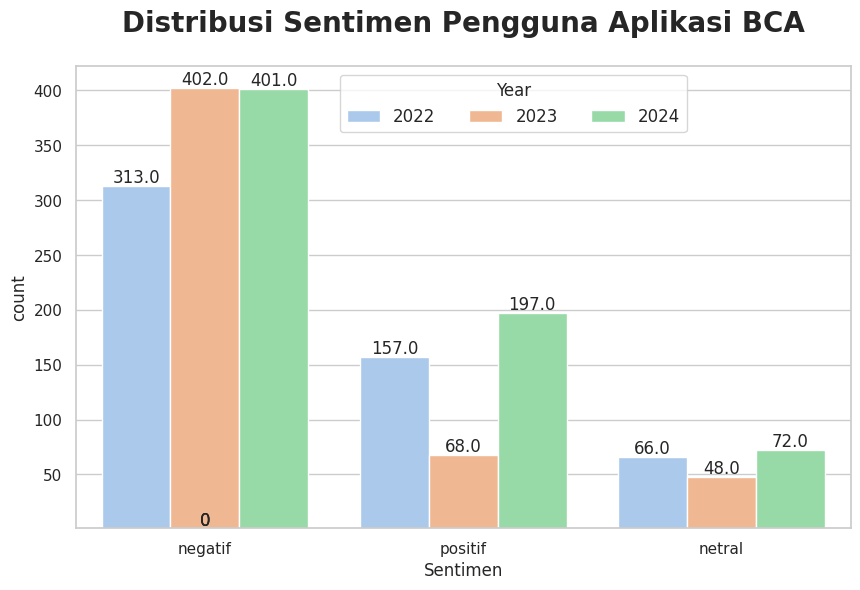

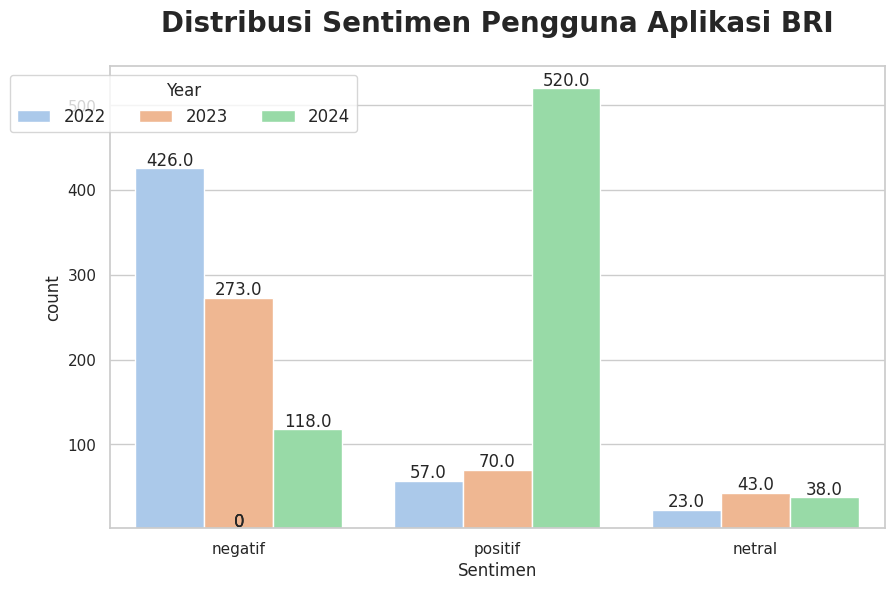

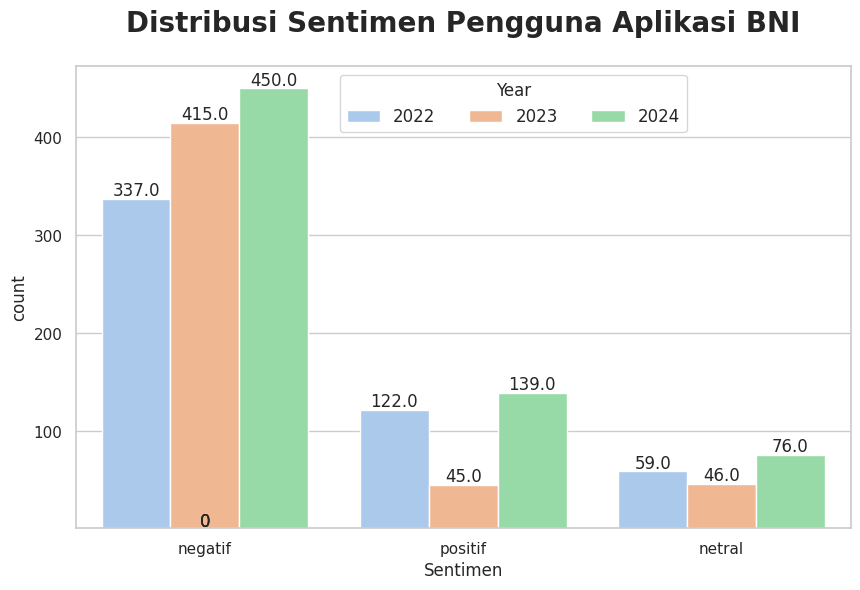

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kolom datetime dan year sudah diproses
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
applications = ['BCA', 'BRI', 'BNI']

for app in applications:
    df_app = df[df['application'] == app]
    position = range(len(df_app['sentimen'].unique()))
    labels = sorted(df_app['sentimen'].unique())

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))

    # Generate plot
    ax = sns.countplot(x="sentimen", hue="year", data=df_app, palette="pastel")

    # Tambahkan label pada setiap bar
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height() + 3.25, rect.get_height(),
                horizontalalignment='center', fontsize=12)

    # Tambahkan legend, title, dan label
    plt.legend(fontsize=12, bbox_to_anchor=(0.33, 1), ncol=3, title="Year", title_fontsize=12)
    plt.title(f"Distribusi Sentimen Pengguna Aplikasi {app}", fontsize=20, fontweight='bold', pad=25)
    plt.xlabel("Sentimen", fontsize=12)
    plt.ylim(1)
    plt.show()

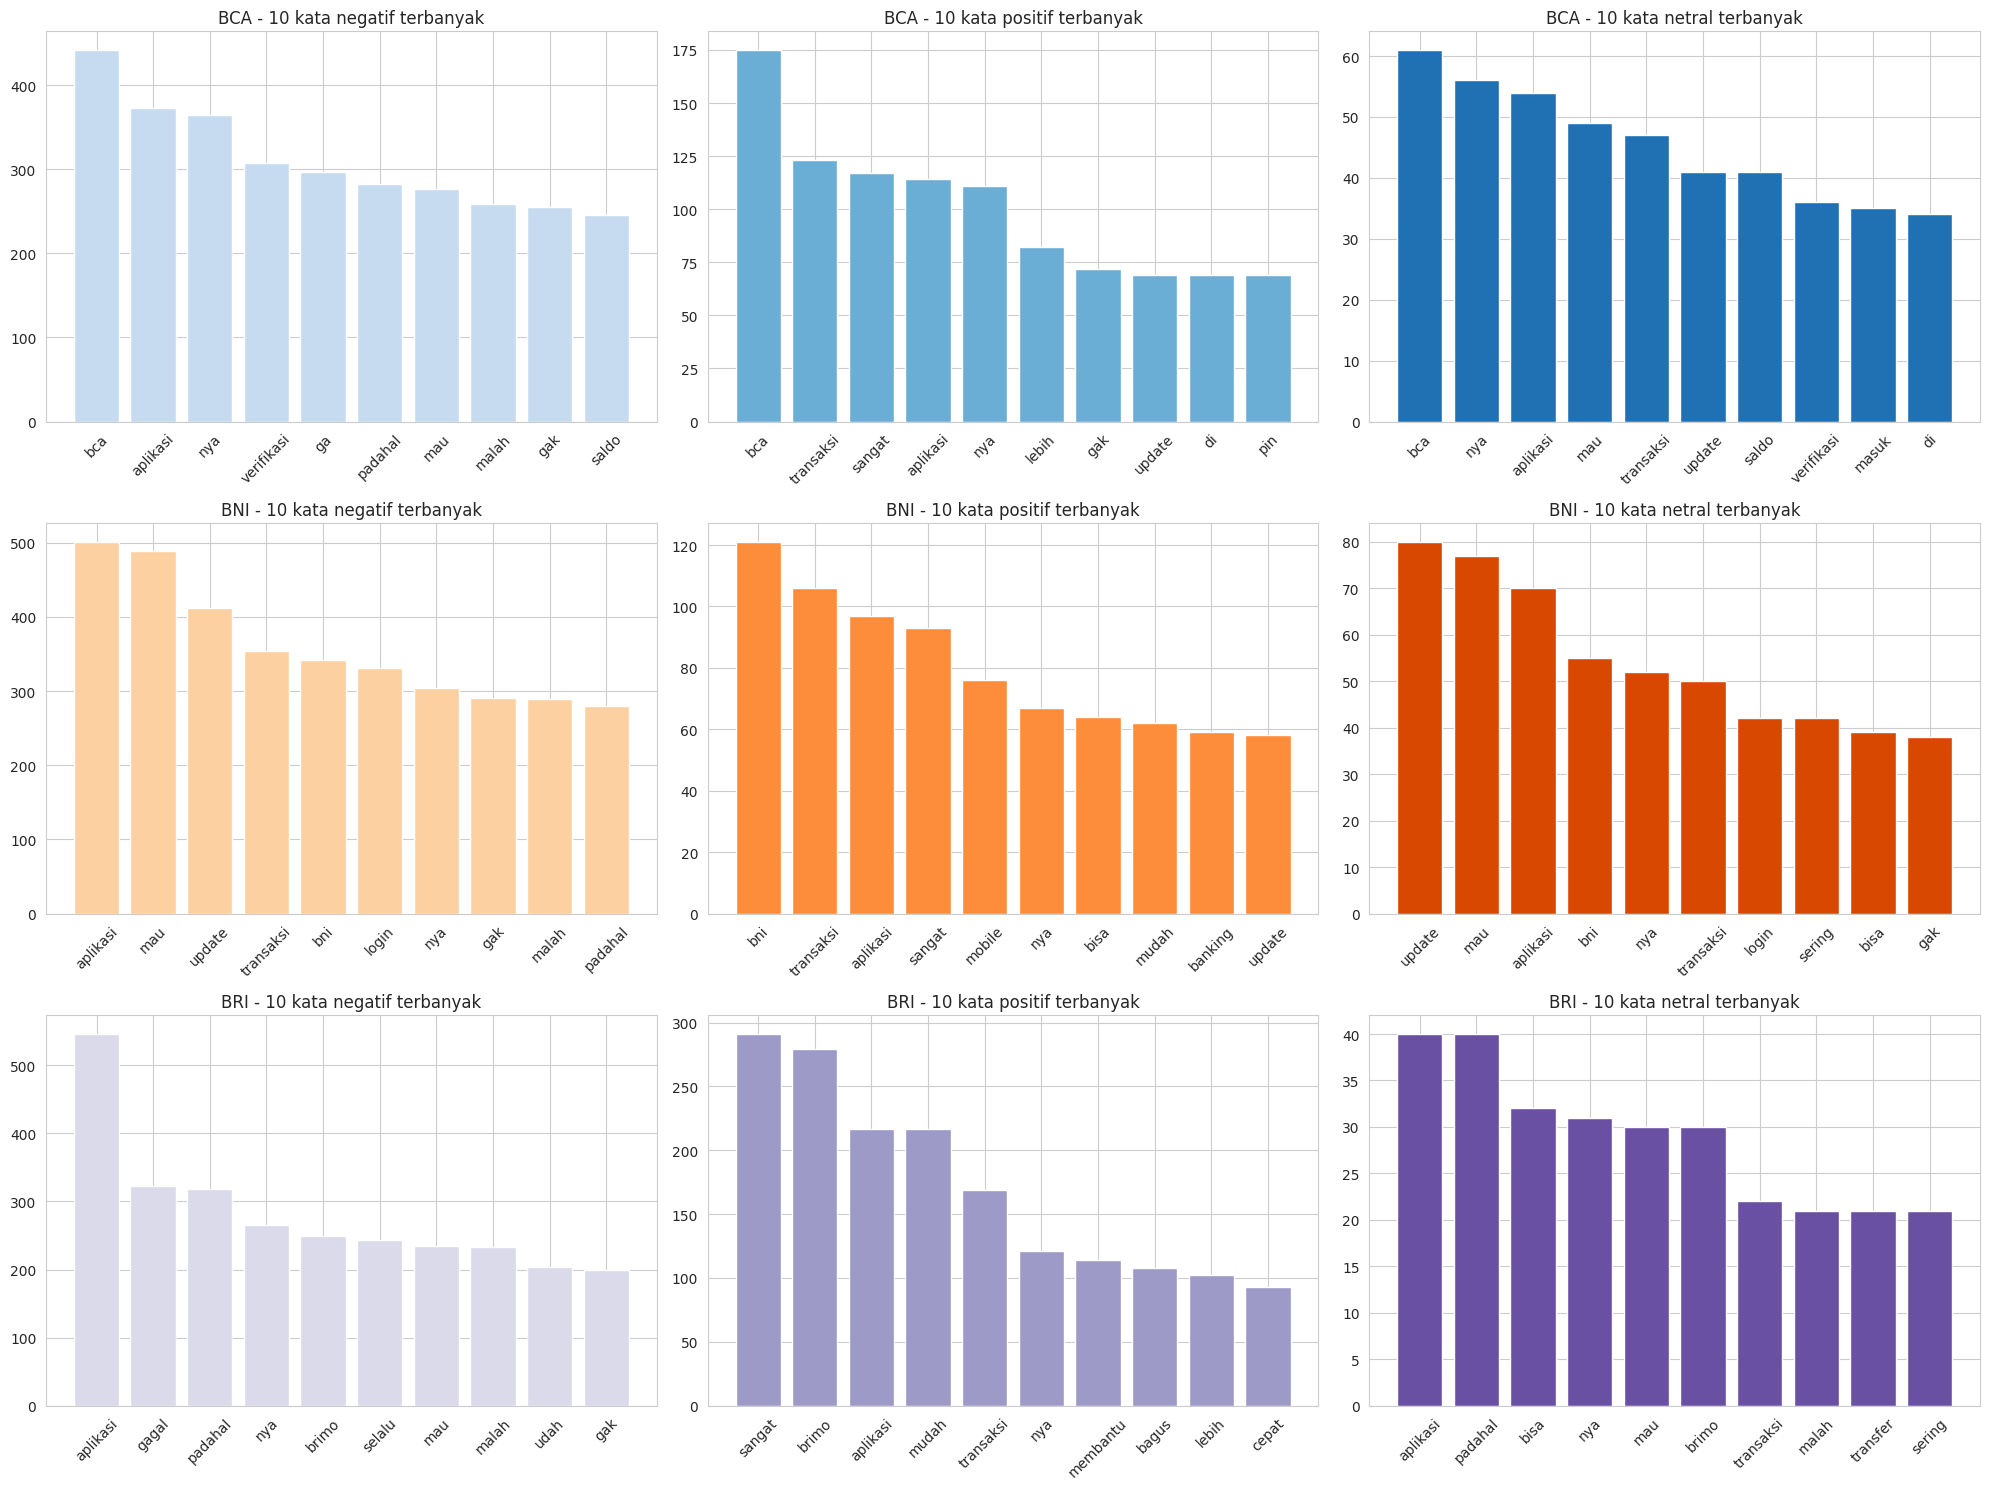

In [18]:
def bersihkan_teks(teks):
    # Mengubah teks menjadi huruf kecil
    teks = teks.lower()

    # Menghapus angka dan simbol, hanya meninggalkan huruf
    teks = re.sub(r'[^a-z\s]', '', teks)

    # Menghapus spasi berlebih
    teks = re.sub(r'\s+', ' ', teks).strip()

    return teks

def hitung_kata_terbanyak(df, aplikasi, sentimen):
    # Ambil komentar berdasarkan aplikasi dan sentimen
    komentar = df[(df['application'] == aplikasi) & (df['sentimen'] == sentimen)]['content']

    # Pastikan semua elemen di 'komentar' adalah string
    komentar = komentar.astype(str)

    # Bersihkan teks
    komentar = komentar.apply(bersihkan_teks)

    # Hitung frekuensi kata
    kata_counter = Counter()
    komentar.apply(lambda x: kata_counter.update(x.split()))

    # Return DataFrame dengan 10 kata terbanyak
    return pd.DataFrame(kata_counter.most_common(10), columns=['Kata', 'Frekuensi'])

def visualiasi_kata(top_kata_df, judul, warna, posisi):
  plt.subplot(3, 3, posisi)
  plt.bar(top_kata_df['Kata'], top_kata_df['Frekuensi'], color=warna)
  plt.title(judul)
  plt.xticks(rotation=45)


aplikasi_list = ['BCA', 'BNI', 'BRI']
sentimen_list = ['negatif', 'positif', 'netral']

palette = {
    'BCA': sns.color_palette("Blues", 3),
    'BRI': sns.color_palette("Purples", 3),
    'BNI': sns.color_palette("Oranges", 3),
}

plt.figure(figsize=(20,15))

posisi = 1

for aplikasi in aplikasi_list:
    for idx, sentimen in enumerate(sentimen_list):
        top_kata_df = hitung_kata_terbanyak(df, aplikasi, sentimen)
        warna = palette[aplikasi][idx]
        judul = f'{aplikasi} - 10 kata {sentimen} terbanyak'
        visualiasi_kata(top_kata_df, judul, warna, posisi)
        posisi += 1

plt.tight_layout()
plt.show()



# 5. Prepare Data Training


In [19]:
df_bca = df[df['application'] == 'BCA']
df_bri = df[df['application'] == 'BRI']
df_bni = df[df['application'] == 'BNI']

In [20]:
x_bca = df_bca['content']
y_bca = df_bca['sentimen']

x_bri = df_bri['content']
y_bri = df_bri['sentimen']

x_bni = df_bni['content']
y_bni = df_bni['sentimen']


In [21]:
data = {
    'BCA': (x_bca, y_bca),
    'BRI': (x_bri, y_bri),
    'BNI': (x_bni, y_bni)
}

# 6. Training Data


In [22]:
results = []

for app, (X, y) in data.items():
  x_train, x_test, y_train, y_test = train_test_split(X,y , test_size=0.15, random_state=42)


  # Pastikan setiap elemen X adalah string
  x_train = [" ".join(doc) if isinstance(doc, list) else doc for doc in x_train]
  x_test = [" ".join(doc) if isinstance(doc, list) else doc for doc in x_test]


  vectorizer = CountVectorizer()
  x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
  x_test_vectorized = vectorizer.transform(x_test).toarray()


  classifiers = {
      'KNN':KNeighborsClassifier(n_neighbors=5),
      'RandomForest': RandomForestClassifier(),
      'NaiveBayes': MultinomialNB(),
      'SVM': SVC(kernel='linear')

  }

  for clf_name, clf in classifiers.items():
    clf.fit(x_train_vectorized, y_train)
    y_pred = clf.predict(x_test_vectorized)


    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    results.append({
        'Application': app,
        'Classifier': clf_name,
        "Accuracy": accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    })



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# 7. Comperative Evaluation


In [24]:
df_results = pd.DataFrame(results)
df_results

,Application,Classifier,Accuracy,Recall,Precision,F1 Score
0,BCA,KNN,0.552124,0.552124,0.658675,0.549861
1,BCA,RandomForest,0.756757,0.756757,0.694285,0.703532
2,BCA,NaiveBayes,0.756757,0.756757,0.684110,0.710666
3,BCA,SVM,0.644788,0.644788,0.656715,0.649515
4,BRI,KNN,0.466102,0.466102,0.634080,0.338938
5,BRI,RandomForest,0.843220,0.843220,0.816659,0.823745
6,BRI,NaiveBayes,0.834746,0.834746,0.815300,0.816411
7,BRI,SVM,0.783898,0.783898,0.794309,0.788645
8,BNI,KNN,0.582677,0.582677,0.554421,0.560443
9,BNI,RandomForest,0.720472,0.720472,0.627418,0.636614


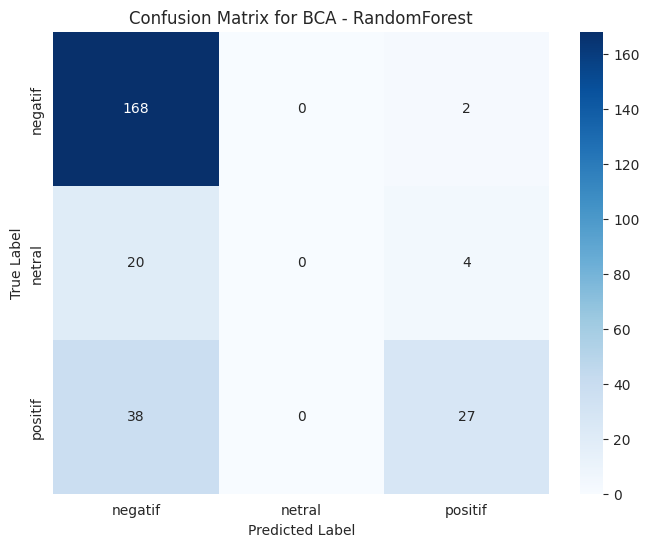

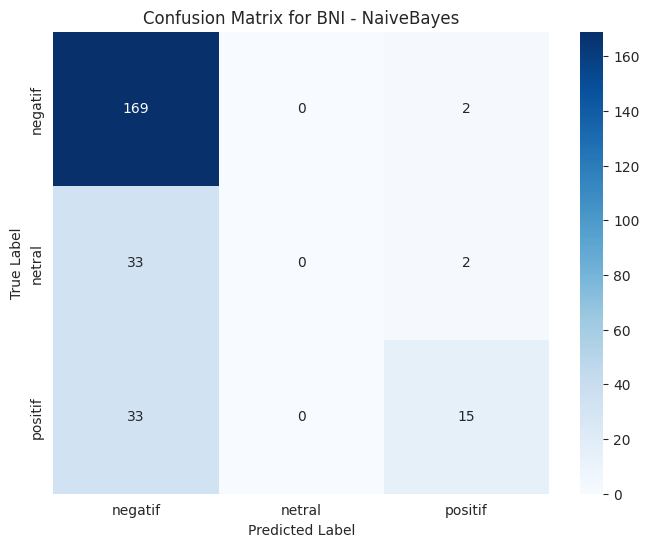

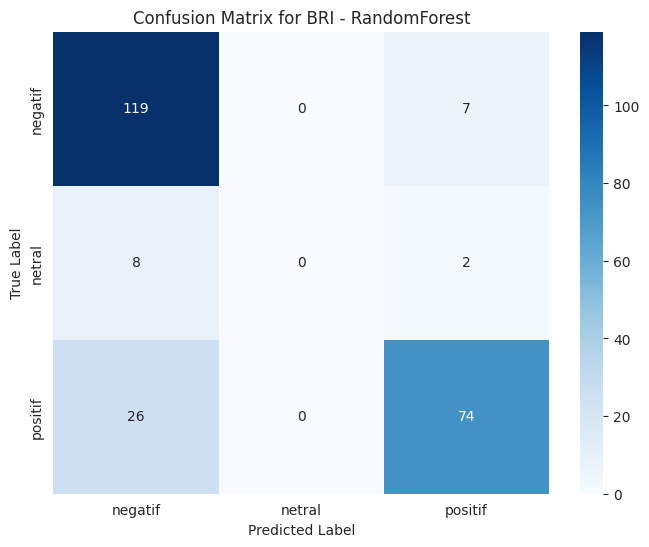

In [25]:
best_classifiers = df_results.loc[df_results.groupby('Application')['Accuracy'].idxmax()]

for index, row in best_classifiers.iterrows():
    app = row['Application']
    clf_name = row['Classifier']

    # Split data menjadi train dan test
    X, y = data[app]  # Ambil data sesuai aplikasi
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Pastikan setiap elemen adalah string
    x_train = [" ".join(doc) if isinstance(doc, list) else doc for doc in x_train]
    x_test = [" ".join(doc) if isinstance(doc, list) else doc for doc in x_test]

    # Vectorize data
    vectorizer = CountVectorizer()
    x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
    x_test_vectorized = vectorizer.transform(x_test).toarray()

    # Ambil classifier yang sesuai
    clf = classifiers[clf_name]
    clf.fit(x_train_vectorized, y_train)
    y_pred = clf.predict(x_test_vectorized)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_train),
                yticklabels=np.unique(y_train))

    plt.title(f"Confusion Matrix for {app} - {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


<ipython-input-27-69bc5146f2ff>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-27-69bc5146f2ff>:18: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-27-69bc5146f2ff>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-27-69bc5146f2ff>:18: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-27-69bc5146f2ff

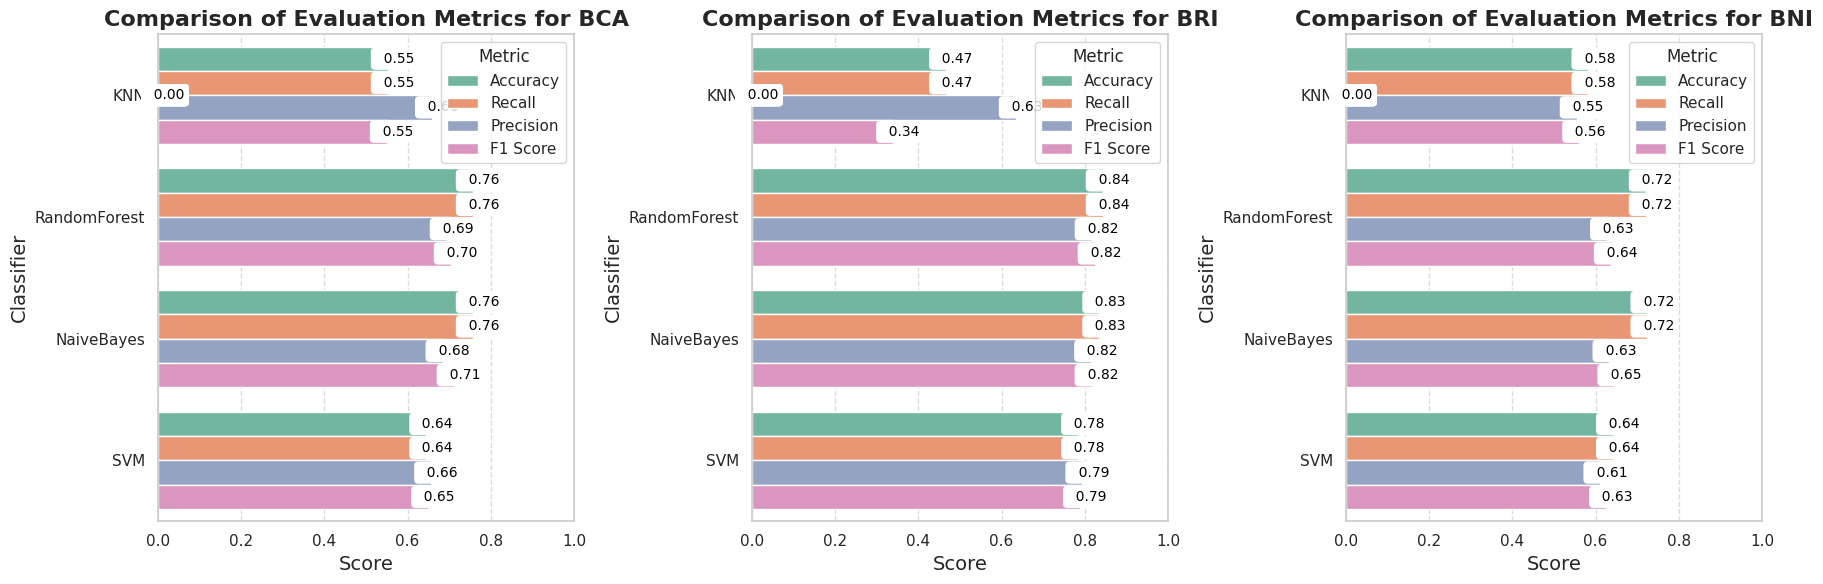

In [27]:
sns.set(style="whitegrid")
palette = sns .color_palette("Set2" )


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

applications = df_results[ 'Application' ].unique()

for ax, app in zip(axes, applications):
    app_results = df_results[df_results['Application' ] == app]

    # Pastikan value_vars menggunakan nama kolom yang benar
    app_results_melted = app_results.melt(id_vars=["Application", "Classifier"],
                                          value_vars=["Accuracy", "Recall", "Precision", "F1 Score"],
                                          var_name="Metric", value_name="Score")


    sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)

    ax.set_title(f'Comparison of Evaluation Metrics for {app}', fontsize=16, weight= 'bold')
    ax. set_xlabel( 'Score', fontsize=14)
    ax. set_ylabel( 'Classifier', fontsize=14)
    ax. set_xlim(0, 1)
    ax. tick_params (axis='y', rotation=0)
    ax. xaxis. grid(True, linestyle='--', alpha=0.7)

    for p in ax.patches:
        score = p.get_width()
        ax. annotate(f' {score: .2f}',
                    (score, p.get_y() + p.get_height()/2),
                    ha= 'center', va= 'center',
                    color='black', fontsize=10,
                    xytext=(5, 0),
                    textcoords= 'offset points',
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle=' round, pad=0.3'))


plt.tight_layout()
plt.show()
